In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [8]:
df_corruption = pd.read_csv('data/corruption.csv')

In [4]:
import plotly.express as px

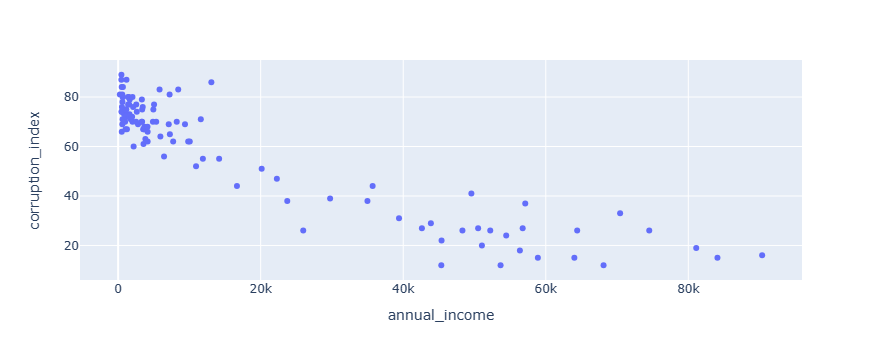

In [9]:
fig = px.scatter(df_corruption, x="annual_income", 
                 y="corruption_index",
                 hover_data=['country'])
fig.show()

In [10]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with corruption data'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by annual income:"),
    dcc.RangeSlider(
        id='range-slider',
        min=1000, max=100000, step=5000,
        marks={0: '0', 2.5: '2.5'},
        value=[5000, 80000]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (df_corruption['annual_income'] > low) & (df_corruption['annual_income'] < high)
    fig = px.scatter(
        df_corruption[mask], x="annual_income", y="corruption_index", 
        color="country", size='corruption_index', 
        hover_data=['country'])
    return fig


app.run_server(debug=True)